In [7]:
import networkx as nx
import json
from eodc_pg_parser.graph import OpenEOProcessGraph

from openeo.internal.process_graph_visitor import ProcessGraphVisitor, ProcessGraphUnflattener
from eodc_pg_parser.pg_schema import ProcessNode, ResultReference, PGEdgeType
import json

In [8]:
flat_graph = json.load(open("../tests/data/pg-evi-example.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)


Deserialised process graph into nested structure


Walking node root-46126815-d50d-4cfd-9c88-df6bb504afd5
Walking node mintime-46126815-d50d-4cfd-9c88-df6bb504afd5
Walking node min-b18ce4d7-f498-47ed-804d-068323563eba
Walking node evi-46126815-d50d-4cfd-9c88-df6bb504afd5
Walking node m3-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node div-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node sub-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node nir-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node red-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node sum-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node nir-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node m1-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node red-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node m2-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node blue-ebf19d11-dea5-463e-a07c-737ed027c47a
Walking node load_collection-46126815-d50d-4cfd-9c88-df6bb504afd5


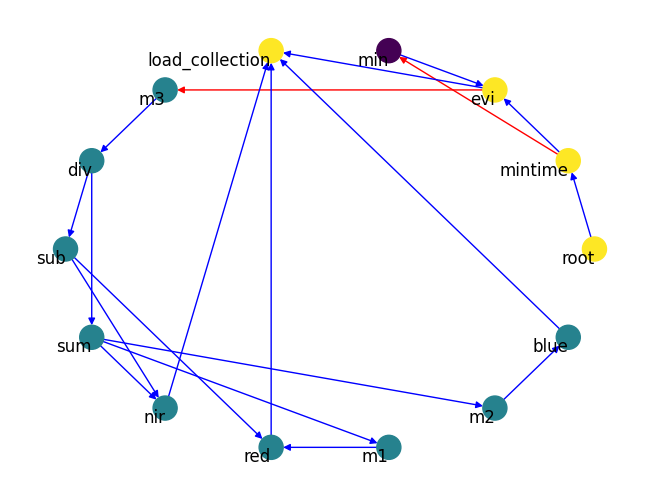

In [9]:
parsed_graph.plot()

In [10]:
parsed_graph.G.nodes

NodeView(('root-46126815-d50d-4cfd-9c88-df6bb504afd5', 'mintime-46126815-d50d-4cfd-9c88-df6bb504afd5', 'evi-46126815-d50d-4cfd-9c88-df6bb504afd5', 'min-b18ce4d7-f498-47ed-804d-068323563eba', 'load_collection-46126815-d50d-4cfd-9c88-df6bb504afd5', 'm3-ebf19d11-dea5-463e-a07c-737ed027c47a', 'div-ebf19d11-dea5-463e-a07c-737ed027c47a', 'sub-ebf19d11-dea5-463e-a07c-737ed027c47a', 'sum-ebf19d11-dea5-463e-a07c-737ed027c47a', 'nir-ebf19d11-dea5-463e-a07c-737ed027c47a', 'red-ebf19d11-dea5-463e-a07c-737ed027c47a', 'm1-ebf19d11-dea5-463e-a07c-737ed027c47a', 'm2-ebf19d11-dea5-463e-a07c-737ed027c47a', 'blue-ebf19d11-dea5-463e-a07c-737ed027c47a'))

In [11]:
nx.get_node_attributes(parsed_graph.G, "resolved_kwargs")

{'root-46126815-d50d-4cfd-9c88-df6bb504afd5': {'data': ResultReference(from_node='mintime', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute a minimum time composite by reducing the temporal dimension', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='evi', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute the EVI. Formula: 2.5 * (NIR - RED) / (1 + NIR + 6*RED + -7.5*BLUE)', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='load_collection', node=ProcessNode(process_id='load_collection', namespace=None, result=False, description='Loading the data', arguments={'id': ProcessArgument(__root__='Sentinel-2'), 'spatial_extent': ProcessArgument(__root__={'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2}), 'temporal_extent': ProcessArgument(__root__=['2018-01-01', '2018-02-01']), 'bands': ProcessArgument(__root__=['B02', 'B04', 'B08'])}))), 'dime

In [12]:
for edge in parsed_graph.G.edges(data=True):
    print(edge)

('root-46126815-d50d-4cfd-9c88-df6bb504afd5', 'mintime-46126815-d50d-4cfd-9c88-df6bb504afd5', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_substitutions': [ArgSubstitution(arg_name='data', access_func=functools.partial(<function OpenEOProcessGraph._walk_node.<locals>.<lambda> at 0x7effb7c1ca60>, node_uid='root-46126815-d50d-4cfd-9c88-df6bb504afd5', arg_name='data'), key='data')]})
('mintime-46126815-d50d-4cfd-9c88-df6bb504afd5', 'evi-46126815-d50d-4cfd-9c88-df6bb504afd5', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_substitutions': [ArgSubstitution(arg_name='data', access_func=functools.partial(<function OpenEOProcessGraph._walk_node.<locals>.<lambda> at 0x7effad8f1e50>, node_uid='mintime-46126815-d50d-4cfd-9c88-df6bb504afd5', arg_name='data'), key='data')]})
('mintime-46126815-d50d-4cfd-9c88-df6bb504afd5', 'min-b18ce4d7-f498-47ed-804d-068323563eba', {'reference_type': <PGEdgeType.Callback: 'callback'>, 'arg_name': 'reducer'})
(

In [13]:

nx.node_link_data(parsed_graph.G)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'process_id': 'save_result',
   'resolved_kwargs': {'data': ResultReference(from_node='mintime', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute a minimum time composite by reducing the temporal dimension', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='evi', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute the EVI. Formula: 2.5 * (NIR - RED) / (1 + NIR + 6*RED + -7.5*BLUE)', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='load_collection', node=ProcessNode(process_id='load_collection', namespace=None, result=False, description='Loading the data', arguments={'id': ProcessArgument(__root__='Sentinel-2'), 'spatial_extent': ProcessArgument(__root__={'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2}), 'temporal_extent': ProcessArgument(__root__=['2018-01-01', '2018-02-01

## Second Process Graph

In [14]:
flat_graph = json.load(open("../tests/data/fit_rf_pg_0.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)


Deserialised process graph into nested structure


Walking node root-c3da22f1-0b52-45a6-be13-8d9bb0cb533a
Walking node fitregrrandomforest1-c3da22f1-0b52-45a6-be13-8d9bb0cb533a


AttributeError: 'NoneType' object has no attribute '__root__'

## Experiments

In [16]:
import inspect

for edge in parsed_graph.G.out_edges:
    print("----------------------------------------------")
    if parsed_graph.G.edges[edge]["reference_type"] == PGEdgeType.ResultReference:
        node_where_parameter_belongs_to = parsed_graph.G.nodes[edge[0]]

        for arg_sub in parsed_graph.G.edges[edge]["arg_substitutions"]:
            arg_sub.access_func(new_value="please_change", set_bool=True)
            print("wait")

print(parsed_graph.G.nodes(data=True))


----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
----------------------------------------------
wait
----------------------------------------------
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
wait
----------------------------------------------
wait
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
[('root-4612

In [ ]:
{node: node_name for node, node_name in nx.get_node_attributes(parsed_graph.G, "node_name").items()}

In [ ]:
import networkx as nx
G = nx.DiGraph()
G.add_edge("here", "there", reference_type="Callback")
G.add_edge("here", "there", reference_type="Callback", tryout="hello")
G.add_edge("here", "there", reference_type="Callback", tryout="hehe")

G.edges(data=True)

In [ ]:
"hfere" in G

In [ ]:
for u, v, data in G.out_edges("here", data=True):
    print(type(u))
    print(v)
    if data["reference_type"] == "Callback":
        print(u)
        print(v)